In [1]:
import os
from pathlib import Path
os.chdir(Path().cwd().parent)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Objectives


Research questions
----------
1. Which features strongly correlate with the critical temperature required to attain superconductivity?
2. Presence of which elements in the compound generally tends to give the highest critical temperatures for superconductivity?
3. What is the most accurate (or least erroneous) model we can build to predict the critical temperature required for superconductivity for a given compound?


In [86]:
raw = pd.read_csv('dataset/train.csv')
rawelem = pd.read_csv('dataset/unique_m.csv')

In [87]:
raw.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [88]:
rawelem.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


## **Q1** | Which features are the strongest indicators?

In [24]:
temp = raw['critical_temp']
features = raw.drop(columns=['critical_temp']).columns.tolist()
correlations = {feature: [temp.corr(raw[feature])] for feature in features}

In [62]:
corrdf = (
    pd.DataFrame(correlations, index=['Correlations'])
    .T
    .sort_values(by='Correlations', 
                 key=lambda x: x.abs(), 
                 ascending=False)
    .reset_index()
    .rename(columns={'index': 'Features'})
)

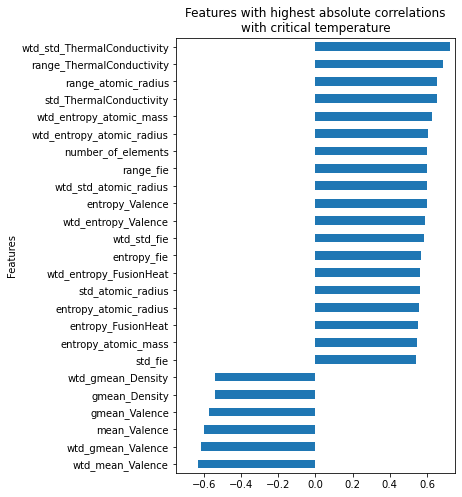

In [85]:
_ = (
    corrdf
    .loc[lambda x: x['Correlations'].abs() >= 0.5]
    .sort_values(by='Correlations')
    .plot(x='Features', 
          y='Correlations',
          figsize=(5, 8),
          kind='barh', 
          legend=False,
          xlim=(-0.75, 0.75),
          title='Features with highest absolute correlations\nwith critical temperature')
)

## **Q2** | 